In [10]:
from src.paths import LOCAL_RAW_DATA_PATH, LOCAL_PROCESSED_DATA_PATH, LOCAL_MODELS_PATH


from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from tqdm._tqdm_notebook import tqdm_notebook
from collections import OrderedDict
from xgboost import plot_importance
import matplotlib.pyplot as plt 
from scipy.stats import skew
import missingno as msno
import pandas as pd
import xgboost
import pickle


tqdm_notebook.pandas()

seed = 42

df_path = LOCAL_PROCESSED_DATA_PATH / 'pretrain_dataset.pkl'
df = pd.read_pickle(df_path)
tgt_vars = [c for c in df.columns if '_change_' in str(c)]

drop_cols = ['created_at', 'created_at_trunc_h', 'id_str',
             'full_text', 'user_screen_name',
             'ma_120_periods', 'ma_720_periods'] + tgt_vars
X_cols = [c for c in df.columns if c not in drop_cols]

In [13]:
X = df[X_cols]
y = df['close_change_2periods_perc']

In [14]:
X.isna().sum().sum(), y.isna().sum()

0

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=seed)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=seed) 

In [97]:
print(X_train.shape,  X_test.shape)
print(y_train.shape,  y_test.shape)
df.shape[0] == X_train.shape[0] + X_test.shape[0] 

(63948, 778) (15987, 778)
(63948,) (15987,)


True

In [99]:
xgboost.set_config(**{'use_rmm': False, 'verbosity': 1})

Training score:  0.21289271692280554


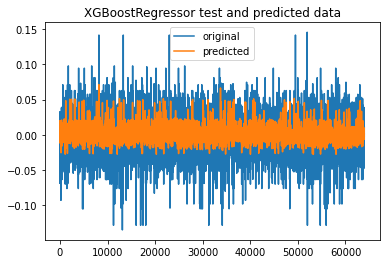

In [101]:
model = xgboost.XGBRegressor(**{
    'colsample_bytree': 0.8,
    'gamma': 0,
    'learning_rate': 0.01,
    'max_depth': 5,
    'min_child_weight': 1.5,
    'n_estimators': 1200,
    'reg_alpha': 0.75,
    'reg_lambda': 0.45,
    'seed': seed,
    'subsample': 0.9
}) 


model.fit(X_train,y_train)

In [104]:
def plot_stats(model, X, y, test_name=None):
    y_pred = model.predict(X)

    score = model.score(X, y)  
    print(f"R^2 score ({test_name}): ", score)

    x_ax = range(len(y))
    plt.plot(x_ax, y, label="original")
    plt.plot(x_ax, y_pred, label="predicted")
    plt.title(f"Model ground truth and predicted data ({test_name})")
    plt.legend()
    plt.show()

R^2 score (training):  0.21289271692280554


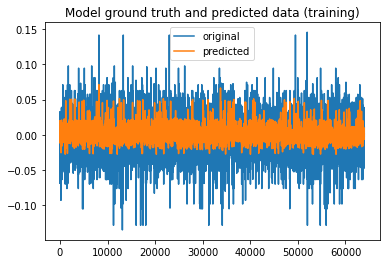

R^2 score (testing):  0.16065266900626762


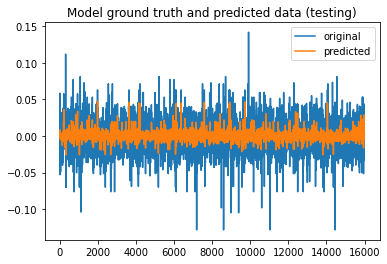

In [105]:
plot_stats(model, X_train, y_train, test_name='training')
plot_stats(model, X_test, y_test, test_name='testing')

In [119]:
import pickle

In [126]:
with open(LOCAL_MODELS_PATH / 'user_label_encoder.pkl', 'rb') as fp:
    user_le = pickle.load(fp)

array(['BarrySilbert'], dtype=object)

In [117]:
def plot_stats(model, X, y, test_name=None):
    y_pred = model.predict(X)

    score = model.score(X, y)  
    print(f"{test_name} - R^2 score: ", score)

    plt.scatter(y, y_pred, label="original", alpha=0.2)
    plt.xlabel('groud truth (y)')
    plt.ylabel('prediction (y)')
    plt.title(f"Model ground truth and predicted data ({test_name})")
    plt.legend()
    plt.show()

training - R^2 score:  0.21289271692280554


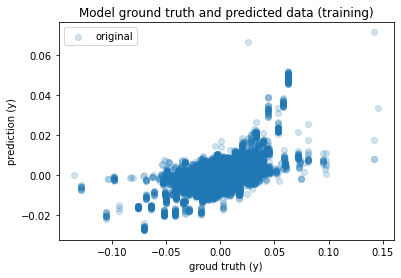

testing - R^2 score:  0.16065266900626762


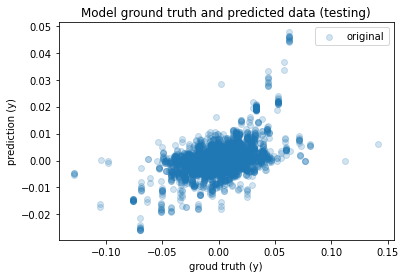

In [118]:
plot_stats(model, X_train, y_train, test_name='training')
plot_stats(model, X_test, y_test, test_name='testing')

aantonop - 3 tweets
aantonop - R^2 score:  0.10976540837412674


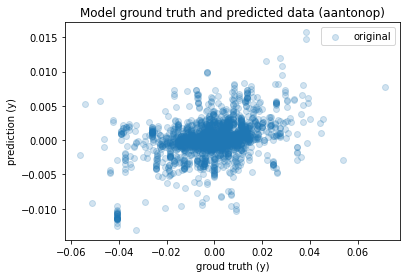

aantonop - R^2 score:  0.0662169120132251


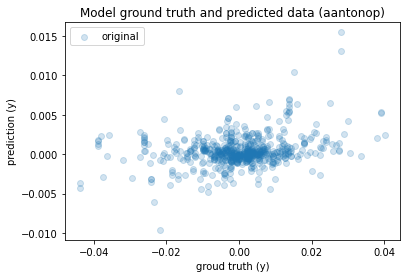

TyDanielSmith - 3316 tweets
TyDanielSmith - R^2 score:  0.10061348710977969


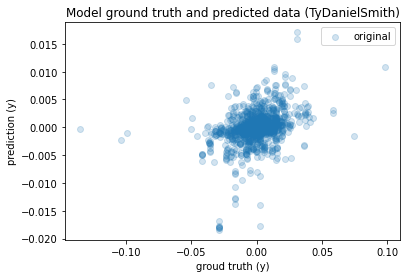

TyDanielSmith - R^2 score:  0.08146978542545413


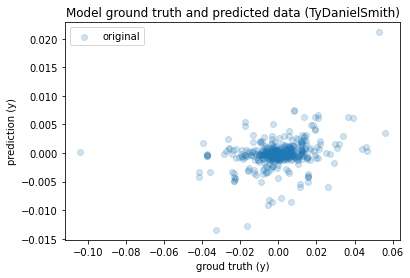

justinsuntron - 2367 tweets
justinsuntron - R^2 score:  0.13433176691592696


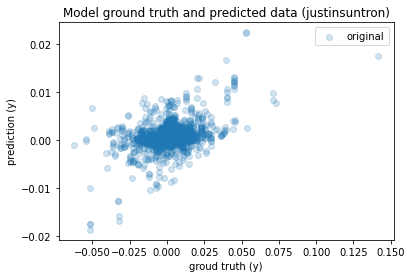

justinsuntron - R^2 score:  0.0073447954695474715


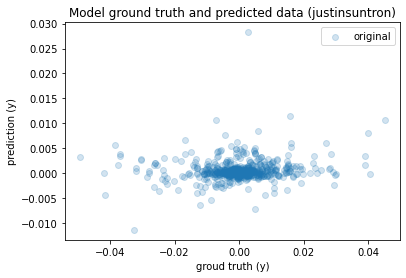

mysticaloaks - 3406 tweets
mysticaloaks - R^2 score:  0.20069508874132236


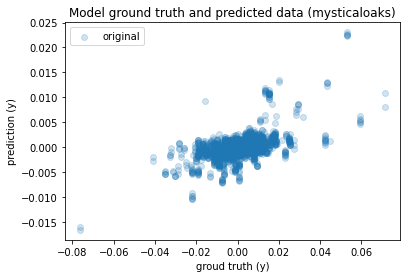

mysticaloaks - R^2 score:  0.12091098237234643


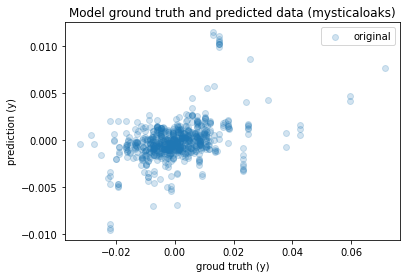

APompliano - 3450 tweets
APompliano - R^2 score:  0.17900484317363619


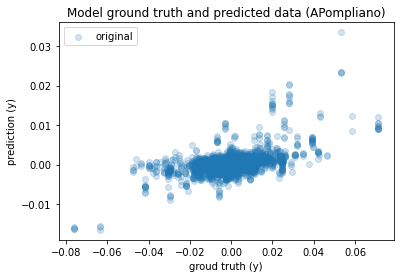

APompliano - R^2 score:  0.15139152225755437


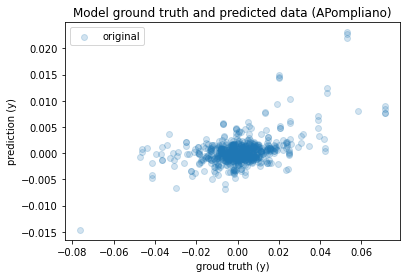

CryptoWendyO - 3449 tweets
CryptoWendyO - R^2 score:  0.1921341512044853


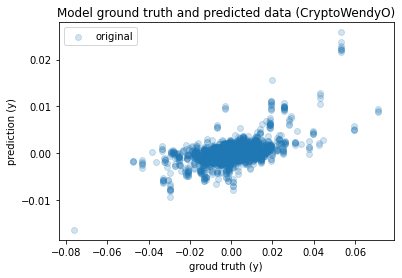

CryptoWendyO - R^2 score:  0.11250115660266369


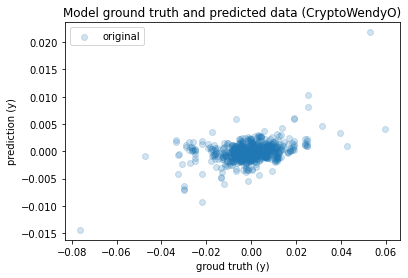

CryptoEuclid - 3436 tweets
CryptoEuclid - R^2 score:  0.17808207622513095


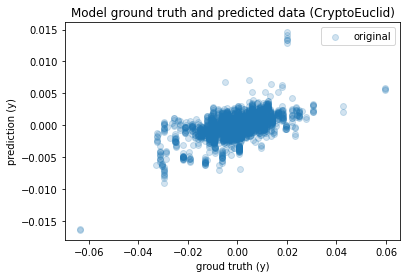

CryptoEuclid - R^2 score:  0.1444186879426992


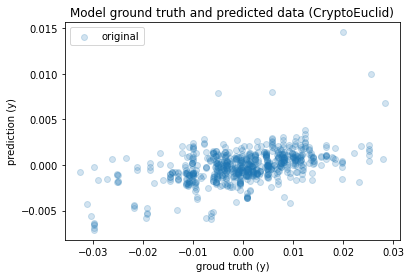

girlgone_crypto - 3341 tweets
girlgone_crypto - R^2 score:  0.17073388571859205


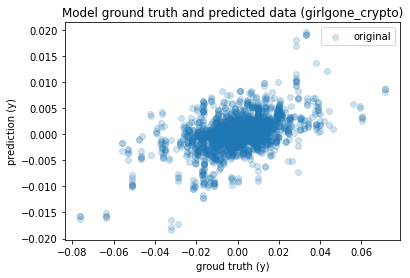

girlgone_crypto - R^2 score:  0.10734973336589071


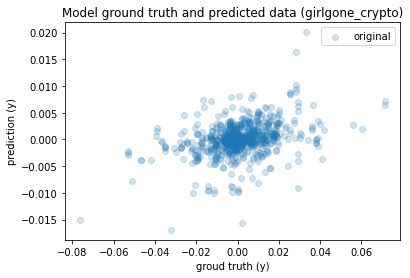

elonmusk - 3448 tweets
elonmusk - R^2 score:  0.1392804706758074


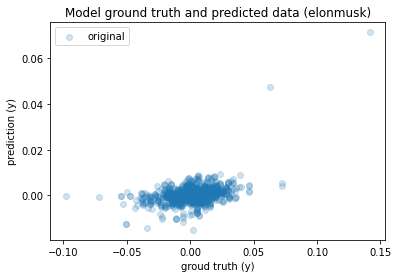

elonmusk - R^2 score:  0.035650964713746625


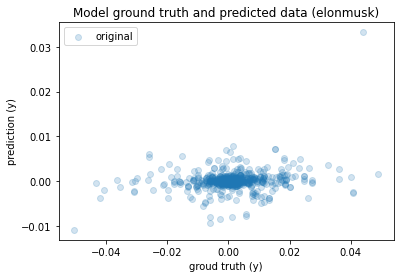

KennethBosak - 3237 tweets
KennethBosak - R^2 score:  0.17845002564546364


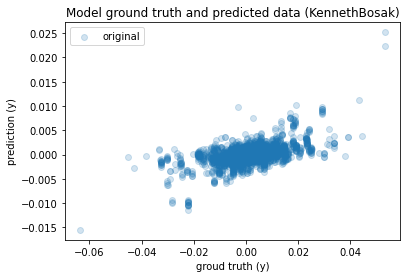

KennethBosak - R^2 score:  0.17502147942003243


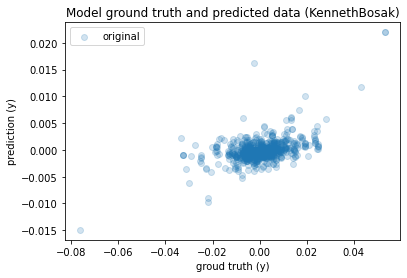

PeterMcCormack - 3450 tweets
PeterMcCormack - R^2 score:  0.40103337752743484


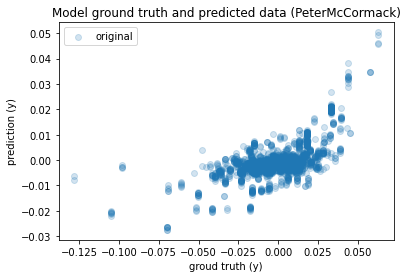

PeterMcCormack - R^2 score:  0.33882320473167604


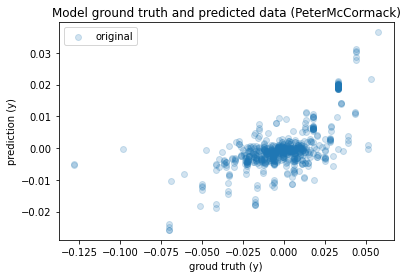

SatoshiLite - 3240 tweets
SatoshiLite - R^2 score:  0.0946342477432025


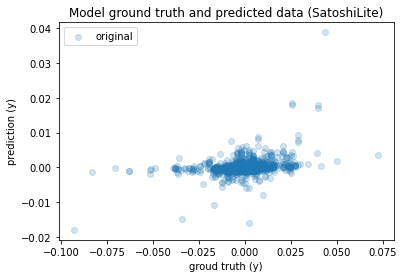

SatoshiLite - R^2 score:  0.06974456904235304


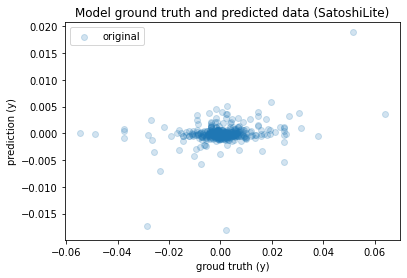

LayahHeilpern - 2120 tweets
LayahHeilpern - R^2 score:  0.3010777648068902


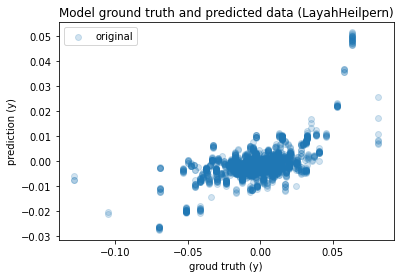

LayahHeilpern - R^2 score:  0.2213775060059242


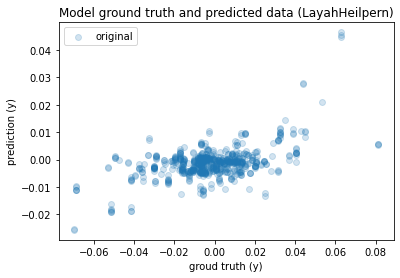

ErikVoorhees - 3246 tweets
ErikVoorhees - R^2 score:  0.2668156100496425


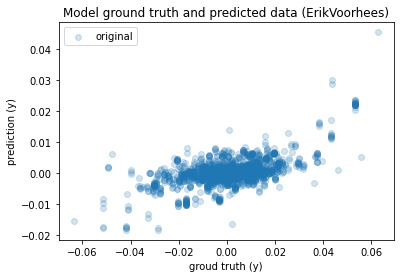

ErikVoorhees - R^2 score:  0.16061232356727628


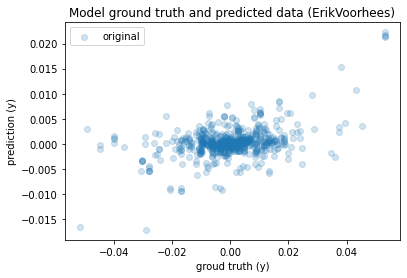

BarrySilbert - 3447 tweets
BarrySilbert - R^2 score:  0.11231942616960089


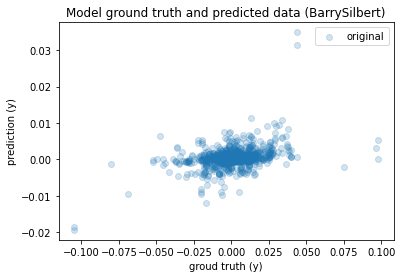

BarrySilbert - R^2 score:  0.08721627643824315


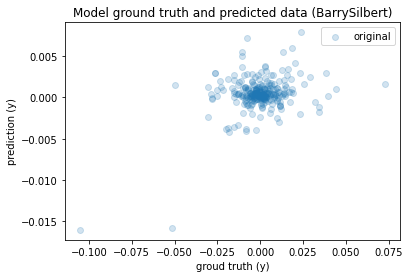

FEhrsam - 1491 tweets
FEhrsam - R^2 score:  0.16240383852146045


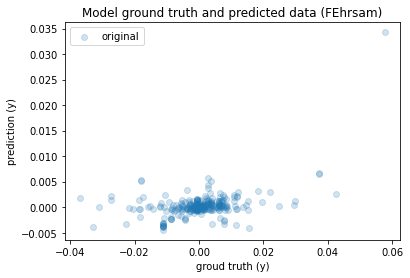

FEhrsam - R^2 score:  0.00624929729017798


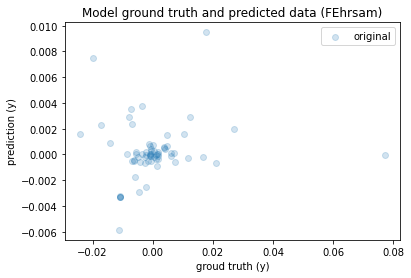

officialmcafee - 337 tweets
officialmcafee - R^2 score:  0.10270020966099214


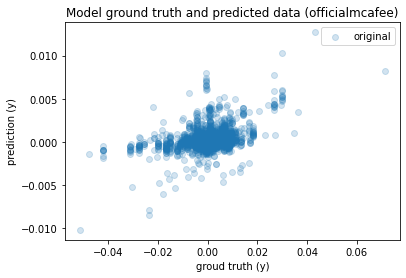

officialmcafee - R^2 score:  0.012261534049167078


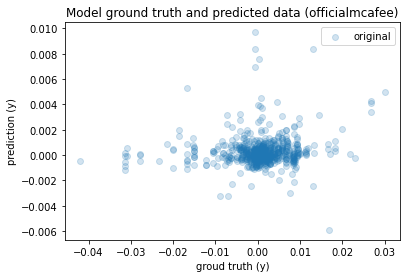

VitalikButerin - 3235 tweets
VitalikButerin - R^2 score:  0.03842113393320035


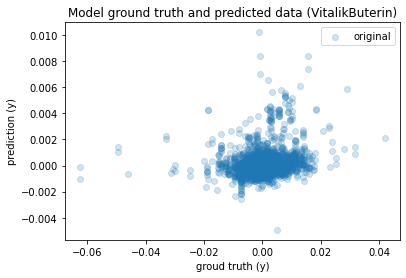

VitalikButerin - R^2 score:  -0.002672983621487157


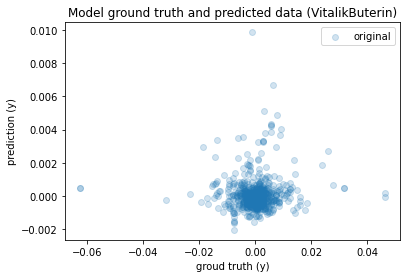

ToneVays - 3191 tweets
ToneVays - R^2 score:  0.12677212983519504


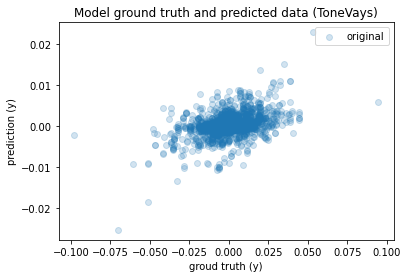

ToneVays - R^2 score:  0.11192730210604629


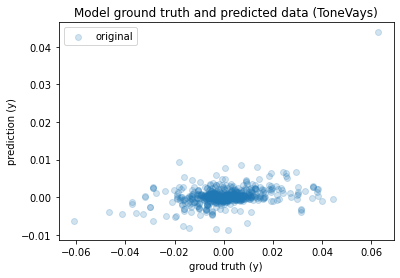

CryptoCobain - 3438 tweets
CryptoCobain - R^2 score:  0.24174905106885525


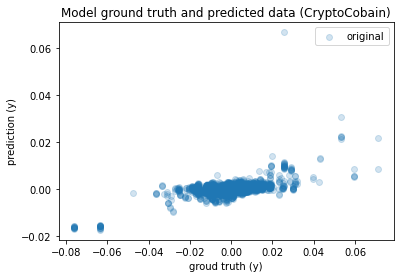

CryptoCobain - R^2 score:  0.1787468999338273


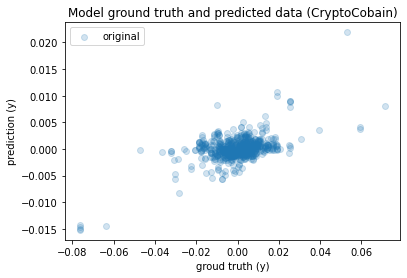

danheld - 3445 tweets
danheld - R^2 score:  0.2603732410571691


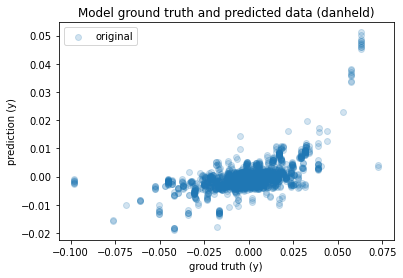

danheld - R^2 score:  0.24828956828415216


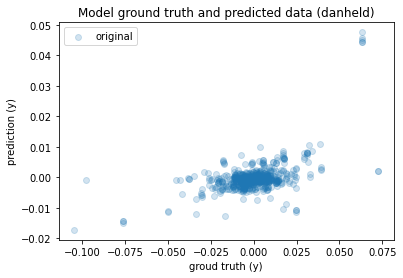

TimDraper - 3241 tweets
TimDraper - R^2 score:  0.09694944039018982


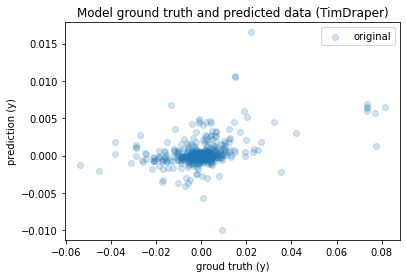

TimDraper - R^2 score:  0.028648549238652343


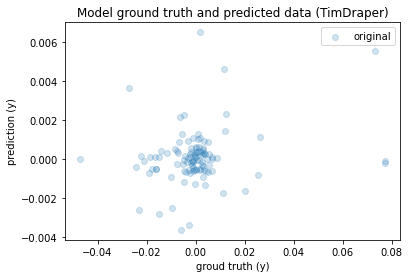

TheCryptoDog - 572 tweets
TheCryptoDog - R^2 score:  0.25493533325882023


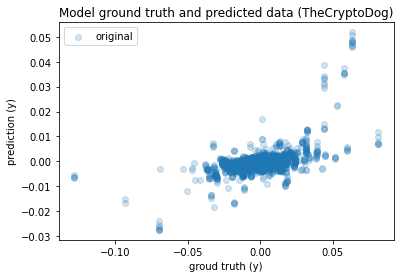

TheCryptoDog - R^2 score:  0.1799930896692361


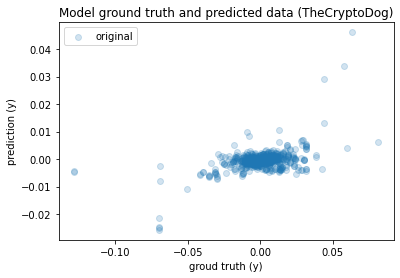

Coinbound_io - 3245 tweets
Coinbound_io - R^2 score:  0.14811876066844498


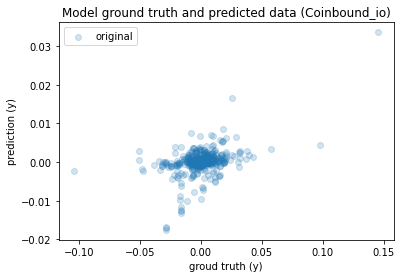

Coinbound_io - R^2 score:  0.03378222598085079


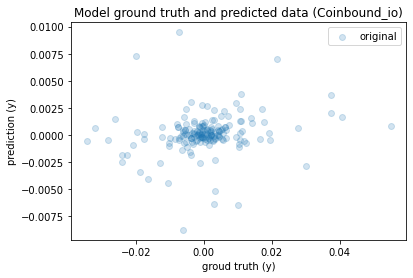

IvanOnTech - 882 tweets
IvanOnTech - R^2 score:  0.13523301887265626


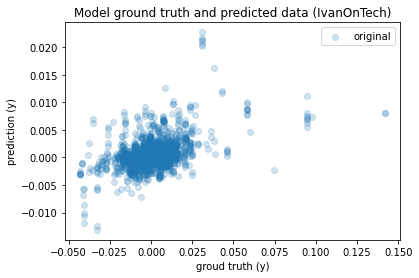

IvanOnTech - R^2 score:  0.10455967800334331


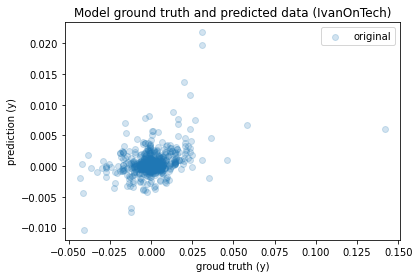

davidgokhshtein - 3410 tweets
davidgokhshtein - R^2 score:  0.2398539689184278


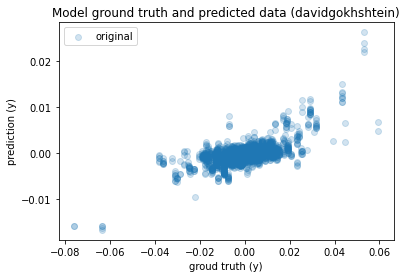

davidgokhshtein - R^2 score:  0.20512988096938345


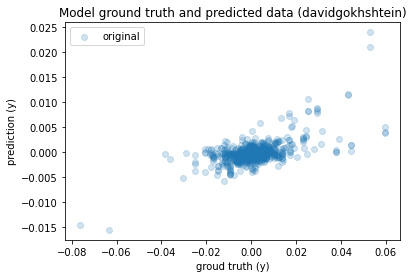

bhorowitz - 3450 tweets
bhorowitz - R^2 score:  0.19113179447997852


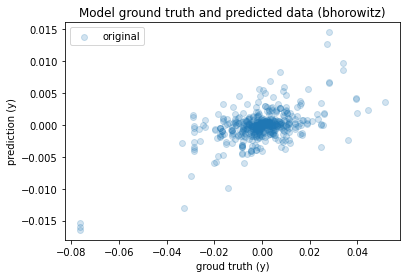

bhorowitz - R^2 score:  0.08170120384967594


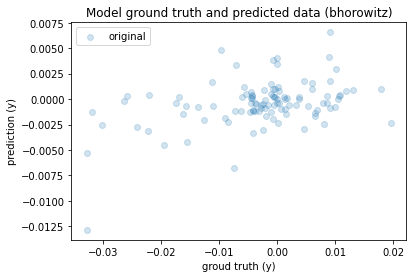

rogerkver - 573 tweets
rogerkver - R^2 score:  0.06229625737777966


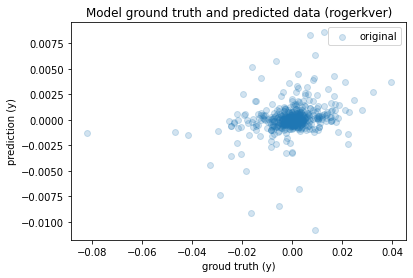

rogerkver - R^2 score:  -0.015705732967933983


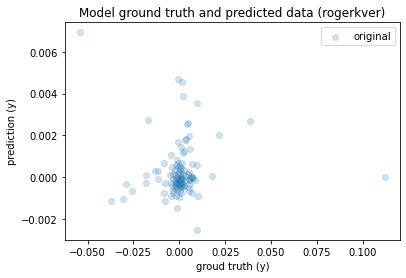

Bitboy_Crypto - 575 tweets
Bitboy_Crypto - R^2 score:  0.140270761453953


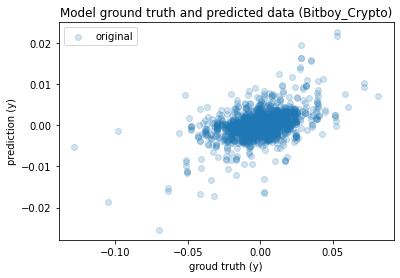

Bitboy_Crypto - R^2 score:  0.126284581406091


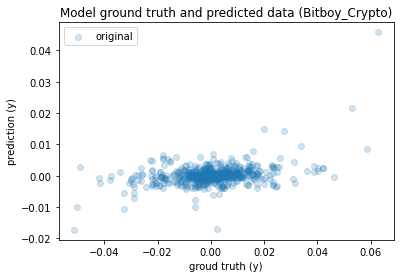

EuclidAndOaks - 3242 tweets
EuclidAndOaks - R^2 score:  0.043445251314168876


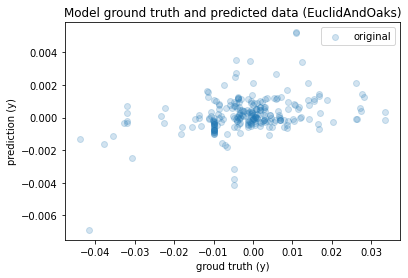

EuclidAndOaks - R^2 score:  -0.012050729794609971


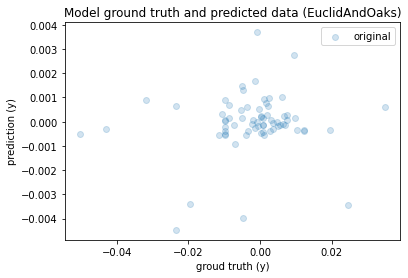

brian_armstrong - 317 tweets
brian_armstrong - R^2 score:  0.08103287842726814


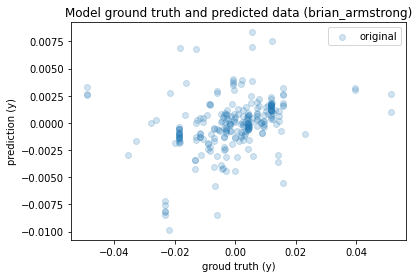

brian_armstrong - R^2 score:  0.0392198255397469


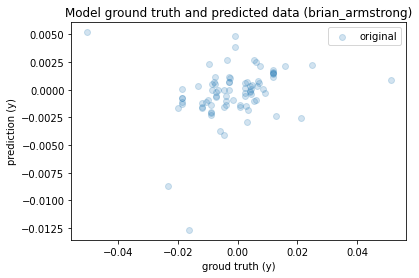

StackingUSD - 332 tweets
StackingUSD - R^2 score:  -0.017660005941421586


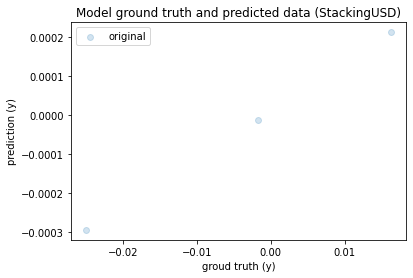

error Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
CryptoBrekkie - 3 tweets
CryptoBrekkie - R^2 score:  -0.06165658582022737


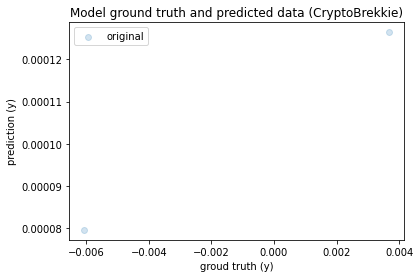

CryptoBrekkie - R^2 score:  nan


c:\users\muril\.virtualenvs\crypto-prophet-ckjwbuny\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


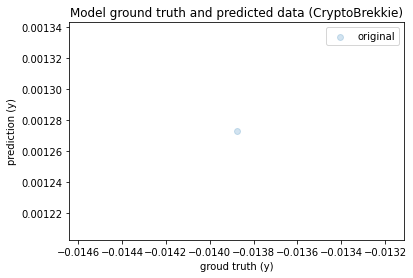

In [138]:
for u in X_train.user_feat.unique():
    user_screen_name = user_le.inverse_transform([u])[0]
    print(f"{user_screen_name} - {mask.sum() + mask_test.sum()} tweets")

    try:
        mask = X_train.user_feat == u
        mask_test = X_test.user_feat == u
        plot_stats(model, X_train[mask], y_train[mask], test_name=user_screen_name)
        plot_stats(model, X_test[mask_test], y_test[mask_test], test_name=user_screen_name)
    except Exception as e:
        print(f'error {e}')
        
    print(20*'=')


In [106]:
scores = cross_val_score(model, X_train, y_train ,cv=10)
print("Cross Val Score: ", score)

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(model, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

KeyboardInterrupt: 

In [59]:
# parameters = {
#     'colsample_bytree': [0.3, 0.8], #0.3 to 0.8
#     'gamma': [0], # 0, 1, 5                 
#     'learning_rate': [0.01, 0.1], # 0.1 and 0.01 #
#     'max_depth': [1,5],
#     'min_child_weight': [1.5],
#     'n_estimators': [1200], #  80-200 if the size of data is high (of the order of millions), 800-1200 is if it is medium-low                                                                    
#     'reg_alpha': [0.75],
#     'reg_lambda': [0.45],
#     'subsample': [0.9,2], #  0.8 and 1
#     'seed': [seed]
# }
# gs = GridSearchCV(xgbr, parameters)
# gs.fit(X_train,y_train)
# y_pred = gs.predict(X_train)


In [ ]:
# model = xgboost.XGBRegressor(
#                  colsample_bytree=0.5, #0.3 to 0.8
#                  gamma=0, # 0, 1, 5                 
#                  learning_rate=0.07, # 0.1 and 0.01 #
#                  max_depth=3,
#                  min_child_weight=1.5,
#                  n_estimators=1200, #  80-200 if the size of data is high (of the order of millions), 800-1200 is if it is medium-low                                                                    
#                  reg_alpha=0.75,
#                  reg_lambda=0.45,
#                  subsample=0.8, #  0.8 and 1
#                  seed=seed) 

# model.fit(X_train,y_train)

# score = model.score(X_train, y_train)  
# print("Training score: ", score)

# y_pred = model.predict(X_train)
# x_ax = range(len(y_train))
# plt.plot(x_ax, y_train, label="original")
# plt.plot(x_ax, y_pred, label="predicted")
# plt.title("XGBoostRegressor test and predicted data")
# plt.legend()
# plt.show()
